<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

ModuleNotFoundError: No module named 'pandas_datareader'

http://www.chinacef.cn/index.php/index/article/article_id/4903<br>
https://www.investopedia.com/terms/i/icor.asp

Usually we define macro leverage ratio as

$$
\frac{\text{Total Debt}}{\text{GDP}}\%
$$

But it can be decomposed into

$$
\frac{\text{Total Debt (D)}}{\text{GDP (Y)}} = \frac{D}{\text {Assets}}\frac{\text {Assets}}{Y} = \text{Debt/Asset Ratio}\times \text{Incremental Capital-Output Ratio (ICOR)}
$$

Note that
$$ICOR = \frac{1}{MPK}=\frac{\Delta K}{\Delta Y}=\frac{\frac{\Delta K}{Y}}{\frac{\Delta Y}{Y}}=\frac{\frac{I-\delta K}{Y}}{\frac{\Delta Y}{Y}}=\frac{\frac{sY-\delta K}{Y}}{\frac{\Delta Y}{Y}}$$

$ICOR$ is specifically useful indicator to measure the investment efficiency. If it raises, it means the more capital has been invested in order to maintain the similar level of output.

**From the equation, we can tell that the inefficiencies of the economy ($MPK$ drops, or $ICOR$ rises), the total debet ratio would rise as well.**

As an example, if the level of investment (as a share of GDP) in a developing country had been (approximately) $20\%$ over a particular period, and if the growth rate had been (approximately) $5\%$ per year during the same period, then the $ICOR$ would be $\frac{20}{5} = 4$.

In [27]:
# real term data, in NIPA table 1.1.6
start = dt.datetime(1960, 1, 1)
end = dt.datetime.today()
df = pdr.data.DataReader(['GPDIA', 'GDPA'], 'fred', start, end) 
df.columns = ['I','Y']

To approximate the $ICOR$

$$
ICOR = \frac{\frac{I-\delta K}{Y}}{\frac{\Delta Y}{Y}}\approx  \frac{\frac{I}{Y}}{\frac{\Delta Y}{Y}}
$$

In [28]:
df['IY_ratio'] = df['I']/df['Y']
df['Delta Y'] = df['Y'].pct_change()
df['ICOR'] = df['IY_ratio']/df['Delta Y'] 
df['ICOR'].describe()

count    59.000000
mean      2.942815
std       1.936040
min      -7.445294
25%       2.075881
50%       2.918319
75%       3.843493
max       9.324918
Name: ICOR, dtype: float64

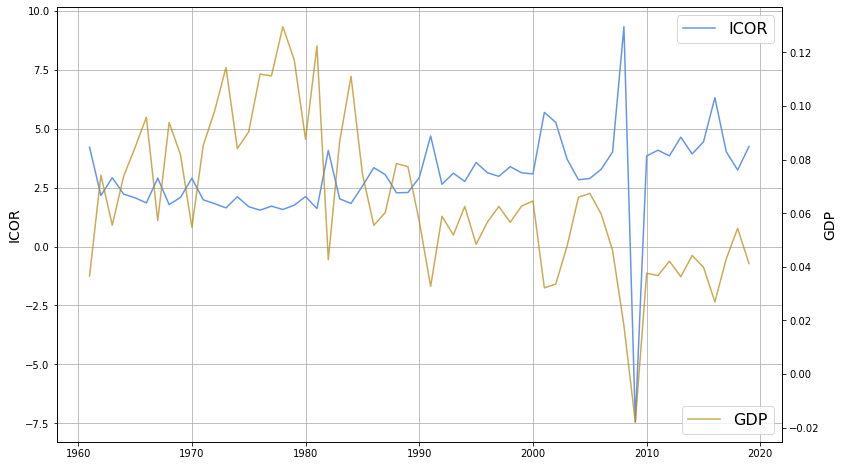

In [29]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(df['ICOR'], color = 'CornflowerBlue', alpha = 1, label = 'ICOR')
ax.set_ylabel('ICOR', size = 14)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(df['Y'].pct_change(), color = 'DarkGoldenRod', alpha = .7, label = 'GDP')
ax_RHS.set_ylabel('GDP', size = 14)

ax.legend(fontsize = 16)
ax_RHS.legend(fontsize = 16, loc = 'lower right')
ax.grid()
plt.show()

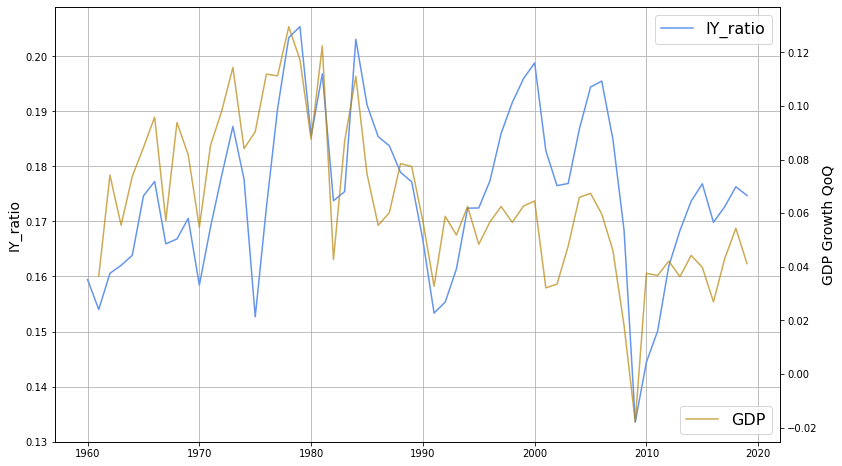

In [30]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(df['IY_ratio'], color = 'CornflowerBlue', alpha = 1, label = 'IY_ratio')
ax.set_ylabel('IY_ratio', size = 14)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(df['Y'].pct_change(), color = 'DarkGoldenRod', alpha = .7, label = 'GDP')
ax_RHS.set_ylabel('GDP Growth QoQ', size = 14)

ax.legend(fontsize = 16)
ax_RHS.legend(fontsize = 16, loc = 'lower right')
ax.grid()
plt.show()

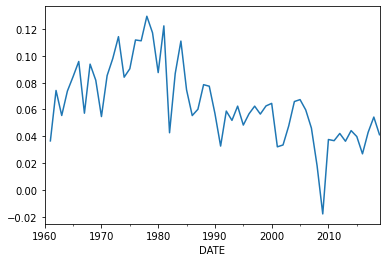

In [33]:
df['Delta Y'].plot()